In [1]:
import pandas as pd

# Train CSV merge

In [ ]:
grow = pd.read_csv('/content/4-2-2-2-4-1113-1000000.csv')
feed = pd.read_csv('/content/4-2-2-1-3-1113-1000000.csv')
feed = feed.groupby('Tank NO').mean()
merge = pd.merge(grow, feed, how = 'left', on = 'Tank NO')
grow = pd.read_csv('/content/4-2-2-2-4-1114-1000000.csv')
feed = pd.read_csv('/content/4-2-2-1-3-1114-1000000.csv')
feed = feed.groupby('Tank NO').mean()
merge1 = pd.merge(grow, feed, how = 'left', on = 'Tank NO')
Final = pd.concat([merge,merge1], axis = 0)

In [ ]:
array11 = [i for i in range(15,31)]
array11 = list(map(str, array11))

#11월달 csv들 read 해서 merge 후 이전 merge csv와 concat
for i in (array11):
  if(i == '27' or i == '28'):
    continue
  else:
    grow = pd.read_csv('/content/4-2-2-2-4-11' + i + '-1000000.csv')
    feed = pd.read_csv('/content/4-2-2-1-3-11' + i + '-1000000.csv')
    feed = feed.groupby('Tank NO').mean()
    merge = pd.merge(grow, feed, how = 'left', on = 'Tank NO')
    Final = pd.concat([Final,merge], axis = 0)



array12 = [i for i in range(1,14)]
array12 = list(map(str, array12))

#12월달 csv들 read 해서 merge 후 이전 merge csv와 concat
for i in (array12):
  i = i.zfill(2)
  grow = pd.read_csv('/content/4-2-2-2-4-12' + i + '-1000000.csv')
  feed = pd.read_csv('/content/4-2-2-1-3-12' + i + '-1000000.csv')
  feed = feed.groupby('Tank NO').mean()
  merge = pd.merge(grow, feed, how = 'left', on = 'Tank NO')
  Final = pd.concat([Final,merge], axis = 0)

In [ ]:
Final

,ID CODE,Tank NO,Length(um),Height(um),Weight(ug),Plakton,Feed(L)
0,2-2-2-2-4-1113-1040011,5,75.1,0.608,0.810,2.0,80.0
1,2-2-2-2-4-1113-1040013,5,76.6,0.629,0.825,2.0,80.0
2,2-2-2-2-4-1113-1040013,5,81.3,0.715,0.872,2.0,80.0
3,2-2-2-2-4-1113-1040013,5,82.8,0.738,0.888,2.0,80.0
4,2-2-2-2-4-1113-1040013,5,84.0,0.769,0.901,2.0,80.0
...,...,...,...,...,...,...,...
18447,2-2-2-2-4-1213-1094054,17,117.5,1.541,1.343,2.0,70.0
18448,2-2-2-2-4-1213-1094054,17,122.4,1.676,1.422,2.0,70.0
18449,2-2-2-2-4-1213-1094054,17,123.0,1.699,1.434,2.0,70.0
18450,2-2-2-2-4-1213-1094054,17,127.6,1.825,1.511,2.0,70.0


In [ ]:
Final.to_csv('Final_ML_Midterm.csv', index = False)

# Test CSV Merge

In [ ]:
grow = pd.read_csv('/content/4-2-2-2-4-1001-1000000.csv')
feed = pd.read_csv('/content/4-2-2-1-3-1001-1000000.csv')
feed = feed.groupby('Tank NO').mean()
merge = pd.merge(grow, feed, how = 'left', on = 'Tank NO')
grow = pd.read_csv('/content/4-2-2-2-4-1002-1000000.csv')
feed = pd.read_csv('/content/4-2-2-1-3-1002-1000000.csv')
feed = feed.groupby('Tank NO').mean()
merge1 = pd.merge(grow, feed, how = 'left', on = 'Tank NO')
Final_T = pd.concat([merge,merge1], axis = 0)

In [ ]:
array10 = [4,6,7,8,9,17,18,19,20,21,22]
array10 = list(map(str, array10))

#10월달 csv들 read 해서 merge 후 이전 merge csv와 concat
for i in (array10):
  i = i.zfill(2)
  grow = pd.read_csv('/content/4-2-2-2-4-10' + i + '-1000000.csv')
  feed = pd.read_csv('/content/4-2-2-1-3-10' + i + '-1000000.csv')
  feed = feed.groupby('Tank NO').mean()
  merge = pd.merge(grow, feed, how = 'left', on = 'Tank NO')
  Final_T = pd.concat([Final_T,merge], axis = 0)


In [ ]:
Final_T.to_csv('Final_Test_ML_Midterm.csv', index = False)

# After CSV Merge


In [2]:
Final = pd.read_csv('Final_ML_Midterm.csv')
Final_T = pd.read_csv('Final_Test_ML_Midterm.csv')

In [3]:
Final['Tank NO'].nunique()

17

In [4]:
Final.isnull().sum() #plakton, Feed null값 존재 확인

ID CODE          0
Tank NO          0
Length(um)       0
Height(um)       0
Weight(ug)       0
Plakton       8122
Feed(L)       8122
dtype: int64

# Feature Engineering

In [5]:
#주지않았으니 0으로 결측치 대체
Final['Feed(L)'] = Final['Feed(L)'].fillna(0)
Final['Plakton'] = Final['Plakton'].fillna(0)

Final_T['Feed(L)'] = Final_T['Feed(L)'].fillna(0)
Final_T['Plakton'] = Final_T['Plakton'].fillna(0)

In [6]:
Final.isnull().sum() #결측치 대체 완료 확인

ID CODE       0
Tank NO       0
Length(um)    0
Height(um)    0
Weight(ug)    0
Plakton       0
Feed(L)       0
dtype: int64

In [7]:
#Length의 스케일이 너무 크니 수업에서 배운대로 스케일링 실시
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler() #0~1사이로 스케일링 시켜주는 minmax사용
Final['Length(um)'] = scaler.fit_transform(Final['Length(um)'].values.reshape(-1,1))
Final_T['Length(um)'] = scaler.transform(Final_T['Length(um)'].values.reshape(-1,1))
Final

,ID CODE,Tank NO,Length(um),Height(um),Weight(ug),Plakton,Feed(L)
0,2-2-2-2-4-1113-1040011,5,0.112304,0.608,0.810,2.0,80.0
1,2-2-2-2-4-1113-1040013,5,0.119016,0.629,0.825,2.0,80.0
2,2-2-2-2-4-1113-1040013,5,0.140045,0.715,0.872,2.0,80.0
3,2-2-2-2-4-1113-1040013,5,0.146756,0.738,0.888,2.0,80.0
4,2-2-2-2-4-1113-1040013,5,0.152125,0.769,0.901,2.0,80.0
...,...,...,...,...,...,...,...
420544,2-2-2-2-4-1213-1094054,17,0.302013,1.541,1.343,2.0,70.0
420545,2-2-2-2-4-1213-1094054,17,0.323937,1.676,1.422,2.0,70.0
420546,2-2-2-2-4-1213-1094054,17,0.326622,1.699,1.434,2.0,70.0
420547,2-2-2-2-4-1213-1094054,17,0.347204,1.825,1.511,2.0,70.0


In [8]:
corr=Final.corr()
corr

,Tank NO,Length(um),Height(um),Weight(ug),Plakton,Feed(L)
Tank NO,1.000000,-0.017332,-0.021101,-0.016129,0.020150,0.092422
Length(um),-0.017332,1.000000,0.973134,0.945791,0.337635,-0.055382
Height(um),-0.021101,0.973134,1.000000,0.992969,0.334743,-0.092757
Weight(ug),-0.016129,0.945791,0.992969,1.000000,0.311407,-0.092965
Plakton,0.020150,0.337635,0.334743,0.311407,1.000000,-0.165883
Feed(L),0.092422,-0.055382,-0.092757,-0.092965,-0.165883,1.000000


# 문제1(Feed(L) 예측) 회귀

In [9]:
#train, test셋 분리
#target값은 Feed로
train_x = Final.drop(['Feed(L)', 'ID CODE'], axis = 1)
train_y = Final['Feed(L)']
test_x = Final_T.drop(['Feed(L)', 'ID CODE'], axis = 1)
submit = Final_T.drop(['Feed(L)', 'ID CODE','Length(um)', 'Height(um)', 'Weight(ug)', 'Plakton', 'Tank NO'], axis = 1)
submit['Feed(L)'] = 0

### Cross Validation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor  #분류로도 풀어볼까?
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

kf = KFold(n_splits=5, shuffle = True) # True로 하고 안하고 차이가 너무 심함
cv_mse = [] 
n_iter = 0

dt_model = DecisionTreeRegressor()
Lasso_model = Lasso()
ridge_model = Ridge()
rf_model = RandomForestRegressor()

for train_idx, test_idx in kf.split(train_x,train_y) :
    X_train , X_test = train_x.iloc[train_idx] , train_x.iloc[test_idx]
    y_train , y_test = train_y.iloc[train_idx] , train_y.iloc[test_idx]

    dt_model.fit(X_train , y_train)
    # 예측
    fold_pred = dt_model.predict(X_test)
    
    # 정확도 측정
    n_iter += 1
    mse = np.round(mean_squared_error(y_test , fold_pred) , 4)
    print('\n{} Tune Decision Tree MSE : {} , training_size : {} , validation_size : {}'.format(n_iter, mse, X_train.shape[0] , X_test.shape[0]))
    cv_mse.append(mse)
print('\n')

print('\n 평균 MSE :  ' , np.mean(cv_mse))


1 Tune Decision Tree MSE : 28.9187 , training_size : 336439 , validation_size : 84110

2 Tune Decision Tree MSE : 28.5735 , training_size : 336439 , validation_size : 84110

3 Tune Decision Tree MSE : 29.1744 , training_size : 336439 , validation_size : 84110

4 Tune Decision Tree MSE : 29.5829 , training_size : 336439 , validation_size : 84110

5 Tune Decision Tree MSE : 29.0565 , training_size : 336440 , validation_size : 84109



 평균 MSE :   29.061199999999996


### Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics


# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 10, 100, 200, 1000])
lasso_params = {'max_iter':[10,100,500,3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
mse_scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
param_grid=lasso_params,
scoring=mse_scorer,
cv=5)
# 그리드서치 수행
gridsearch_lasso_model.fit(train_x, train_y)

In [12]:
print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.001, 'max_iter': 3000}


In [13]:
#Lasso 예측
pred = gridsearch_lasso_model.best_estimator_.predict(test_x)
submit['Feed(L)'] = pred
submit

,Feed(L)
0,47.263899
1,47.377556
2,47.015052
3,47.165847
4,47.223443
...,...
16637,49.787585
16638,49.715903
16639,45.477175
16640,49.992594


In [14]:
#lr_model = LinearRegression().fit(train_x.values,train_y.values)
La1 = Lasso(alpha = 0.1)
La2 = Lasso(alpha = 1)
La3 = Lasso(alpha = 10)
La4 = Lasso(alpha = 1000)
La1.fit(train_x,train_y)
La2.fit(train_x,train_y)
La3.fit(train_x,train_y)
La4.fit(train_x,train_y)

Lasso(alpha=1000)

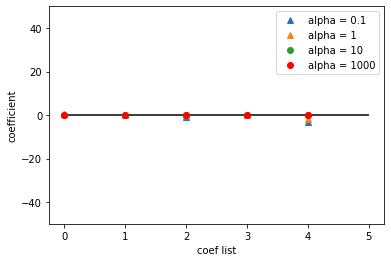

In [15]:
import matplotlib.pyplot as plt
plt.plot(La1.coef_, "^", label = "alpha = 0.1")
plt.plot(La2.coef_, "^", label = "alpha = 1")
plt.plot(La3.coef_, "o", label = "alpha = 10")
plt.plot(La4.coef_, "ro", label = "alpha = 1000")
plt.xlabel("coef list")
plt.ylabel("coefficient")
plt.hlines(0,0,len(La1.coef_))
plt.ylim(-50,50)
plt.legend(loc='upper right', fontsize = 10)
plt.show()

### Ridge

In [16]:
from sklearn import metrics
ridge_model = Ridge()

In [17]:
# 하이퍼파라미터 값 목록
ridge_params = {'max_iter':[0.001,0.1,1,5,10], 'alpha':[0.1, 1, 2, 10, 30, 100, 200, 300]}
# 교차 검증용 평가 함수(RMSLE 점수 계산)
mse_scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)
# 그리드서치(릿지) 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, scoring=mse_scorer, cv=10) # 교차검증 분할 수

In [18]:
gridsearch_ridge_model.fit(train_x, train_y) # 훈련(그리드서치)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 10, 30, 100, 200, 300],
                         'max_iter': [0.001, 0.1, 1, 5, 10]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [19]:
#Ridge 예측
pred = gridsearch_ridge_model.best_estimator_.predict(test_x)
pred

array([47.30609459, 47.43212226, 47.05542849, ..., 45.24843666,
       49.93238855, 49.09947891])

In [20]:
submit['Feed(L)'] = pred
submit

,Feed(L)
0,47.306095
1,47.432122
2,47.055428
3,47.214412
4,47.276580
...,...
16637,49.717040
16638,49.642638
16639,45.248437
16640,49.932389


In [21]:
RR1 = Ridge(alpha = 0.1)
RR2 = Ridge(alpha = 1)
RR3 = Ridge(alpha = 10)
RR4 = Ridge(alpha = 200)
RR1.fit(train_x,train_y)
RR2.fit(train_x,train_y)
RR3.fit(train_x,train_y)
RR4.fit(train_x,train_y)

Ridge(alpha=200)

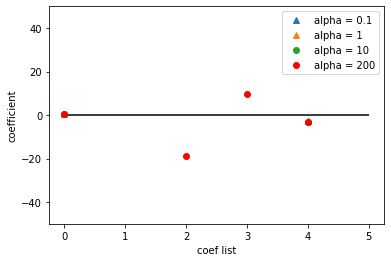

In [22]:
plt.plot(RR1.coef_, "^", label = "alpha = 0.1")
plt.plot(RR2.coef_, "^", label = "alpha = 1")
plt.plot(RR3.coef_, "o", label = "alpha = 10")
plt.plot(RR4.coef_, "ro", label = "alpha = 200")
plt.xlabel("coef list")
plt.ylabel("coefficient")
plt.hlines(0,0,len(RR1.coef_))
plt.ylim(-50,50)
plt.legend(loc='upper right', fontsize = 10)
plt.show()

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

rf_model = RandomForestRegressor()


#하이퍼파라미터 조정 전,  후 mse값 비교하기
rf_params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
#rf_params = {'random_state' : [42] , 'n_estimators' : [5, 10 , 50, 100, 150],'max_depth'= [10],'max_depth' : [6, 8, 10, 12],'min_samples_leaf' : [8, 12, 18], 'min_samples_split' : [8, 16, 20]}
#n_estimators
#- 결정트리의 갯수를 지정
#- Default = 10
#- 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음

#min_samples_split
#- - 노드를 분할하기 위한 최소한의 샘플 데이터수
#→ 과적합을 제어하는데 사용
#- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

#min_samples_leaf
#- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
#- min_samples_split과 함께 과적합 제어 용도
#- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요

#max_features
#- 최적의 분할을 위해 고려할 최대 feature 개수
#- Default = 'auto' (결정트리에서는 default가 none이었음)
#- int형으로 지정 →피처 갯수 / float형으로 지정 →비중
#- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
#- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정

#max_depth
#- 트리의 최대 깊이
#- default = None
#→ 완벽하게 클래스 값이 결정될 때 까지 분할
#또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
#- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요

#max_leaf_nodes	리프노드의 최대 개수
mse_scorer = metrics.make_scorer(mean_squared_error, greater_is_better = False)

gridsearch_random_forest_model = GridSearchCV(estimator = rf_model,\
                                              param_grid = rf_params,\
                                              scoring = mse_scorer,\
                                              cv = 5)

gridsearch_random_forest_model.fit(train_x, train_y)
print("최적 하이퍼파라미터 : ", gridsearch_random_forest_model.best_params_)

In [ ]:
pred = gridsearch_random_forest_model.best_estimator_.predict(test_x)

In [ ]:
submit['Feed(L)'] = pred
submit

### Decision Tree

In [23]:
dt_model = DecisionTreeRegressor()

In [24]:
dt_params = { 
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
mse_scorer = metrics.make_scorer(mean_squared_error, greater_is_better = False)

gridsearch_DecisionTree_model = GridSearchCV(estimator = dt_model,\
                                              param_grid = dt_params,\
                                              scoring = mse_scorer,\
                                              cv = 5)

gridsearch_DecisionTree_model.fit(train_x, train_y)
print("최적 하이퍼파라미터 : ", gridsearch_DecisionTree_model.best_params_)

최적 하이퍼파라미터 :  {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 16}


In [25]:
pred = gridsearch_DecisionTree_model.predict(test_x)
submit['Feed(L)'] = pred
submit

,Feed(L)
0,53.540237
1,53.540237
2,53.540237
3,53.540237
4,53.540237
...,...
16637,73.704051
16638,73.704051
16639,73.704051
16640,73.704051


In [26]:
dt_model.fit(train_x,train_y)

DecisionTreeRegressor()

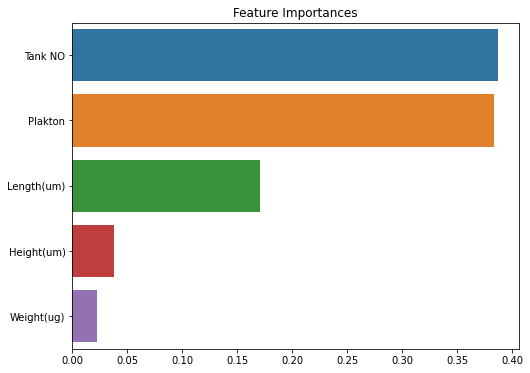

In [27]:
#피쳐임포턴스
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 문제2(TanK NO 예측) 분류

In [28]:
#train, test셋 분리
train_x = Final.drop(['Tank NO', 'ID CODE'], axis = 1)
train_y = Final['Tank NO']
test_x = Final_T.drop(['Tank NO', 'ID CODE'], axis = 1)
submit = Final_T.drop(['Tank NO', 'ID CODE','Length(um)', 'Height(um)', 'Weight(ug)', 'Plakton', 'Tank NO'], axis = 1)
submit['Tank NO'] = 0

### Cross Validation

In [30]:
#Validation Set (Split)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np

kf = KFold(n_splits=5, shuffle = True) # True로 하고 안하고 차이가 너무 심한데?
cv_Accuracy = [] 
n_iter = 0

dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
sgd_model = SGDClassifier()
#svm_model = svm.SVC()
for train_idx, test_idx in kf.split(train_x,train_y) :
    X_train , X_test = train_x.iloc[train_idx] , train_x.iloc[test_idx]
    y_train , y_test = train_y.iloc[train_idx] , train_y.iloc[test_idx]

    # 학습을 진행하겠다면?
    dt_model.fit(X_train , y_train)
    # 예측
    fold_pred = dt_model.predict(X_test)
    
    # 정확도 측정
    n_iter += 1
    Accuracy = np.round(accuracy_score(y_test , fold_pred) , 4) 
    print('\n{} SGD Accuracy : {} , training_size : {} , validation_size : {}'.format(n_iter, Accuracy, X_train.shape[0] , X_test.shape[0]))
    cv_Accuracy.append(Accuracy)
print('\n')

print('\n 평균검증 정확도 :  ' , np.mean(cv_Accuracy))


1 SGD Accuracy : 0.5235 , training_size : 336439 , validation_size : 84110

2 SGD Accuracy : 0.5217 , training_size : 336439 , validation_size : 84110

3 SGD Accuracy : 0.525 , training_size : 336439 , validation_size : 84110

4 SGD Accuracy : 0.5229 , training_size : 336439 , validation_size : 84110

5 SGD Accuracy : 0.5195 , training_size : 336440 , validation_size : 84109



 평균검증 정확도 :   0.5225199999999999


### RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestClassifier()

rf_params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

mse_scorer = metrics.make_scorer(mean_squared_error, greater_is_better = False)

gridsearch_random_forest_model = GridSearchCV(estimator = rf_model,\
                                              param_grid = rf_params,\
                                              scoring = mse_scorer,\
                                              cv = 5)

gridsearch_random_forest_model.fit(train_x, train_y)
print("최적 하이퍼파라미터 : ", gridsearch_random_forest_model.best_params_)

In [ ]:
pred = gridsearch_random_forest_model.best_estimator_.predict(test_x)
submit['Tank NO'] = pred
submit

### Decision Tree

In [31]:
dt_params = { 
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
mse_scorer = metrics.make_scorer(mean_squared_error, greater_is_better = False)

gridsearch_DecisionTree_model = GridSearchCV(estimator = dt_model,\
                                              param_grid = dt_params,\
                                              scoring = mse_scorer,\
                                              cv = 5)

gridsearch_DecisionTree_model.fit(train_x, train_y)
print("최적 하이퍼파라미터 : ", gridsearch_DecisionTree_model.best_params_)

최적 하이퍼파라미터 :  {'max_depth': 12, 'min_samples_leaf': 18, 'min_samples_split': 16}


In [32]:
pred = gridsearch_DecisionTree_model.predict(test_x)
submit['Tank NO'] = pred
submit

,Feed(L),Tank NO
0,80.0,8
1,80.0,8
2,80.0,8
3,80.0,8
4,80.0,8
...,...,...
16637,50.0,5
16638,50.0,5
16639,50.0,7
16640,50.0,5


In [33]:
dt_model.fit(train_x,train_y)

DecisionTreeClassifier()

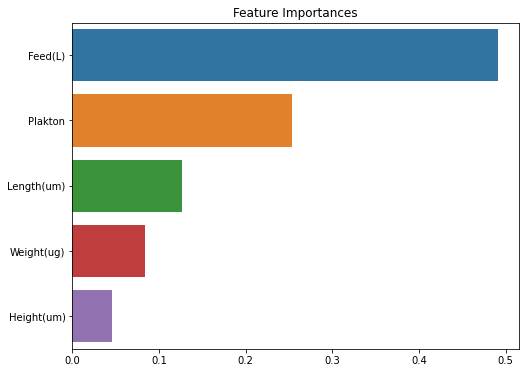

In [34]:
#피쳐임포턴스
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()